In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv("data111_cleaned.csv")

In [9]:
df["age_range"].value_counts()

age_range
6    2371
5    2277
8    2044
4    1732
3    1279
7    1214
2     457
1     243
Name: count, dtype: int64

In [10]:
df.loc[df["3months_use_per_week"] == 1, "age_range"].value_counts()

age_range
5    1615
4    1403
6    1400
3    1074
8     764
7     524
2     291
1      94
Name: count, dtype: int64

In [11]:
df_mean = pd.DataFrame(
    df.groupby(["age_range", "3months_use_per_week"]).mean().reset_index()
)

In [15]:
df_mean.to_csv("basic-app-plot/df_mean.csv", index=False)

In [13]:
line_mean = pd.DataFrame(
    df.groupby(["3months_use_per_week"])
    .mean()
    .reset_index()
    .drop(columns=["age_range"])
)

In [14]:
line_mean.to_csv("basic-app-plot/line_mean.csv", index=False)

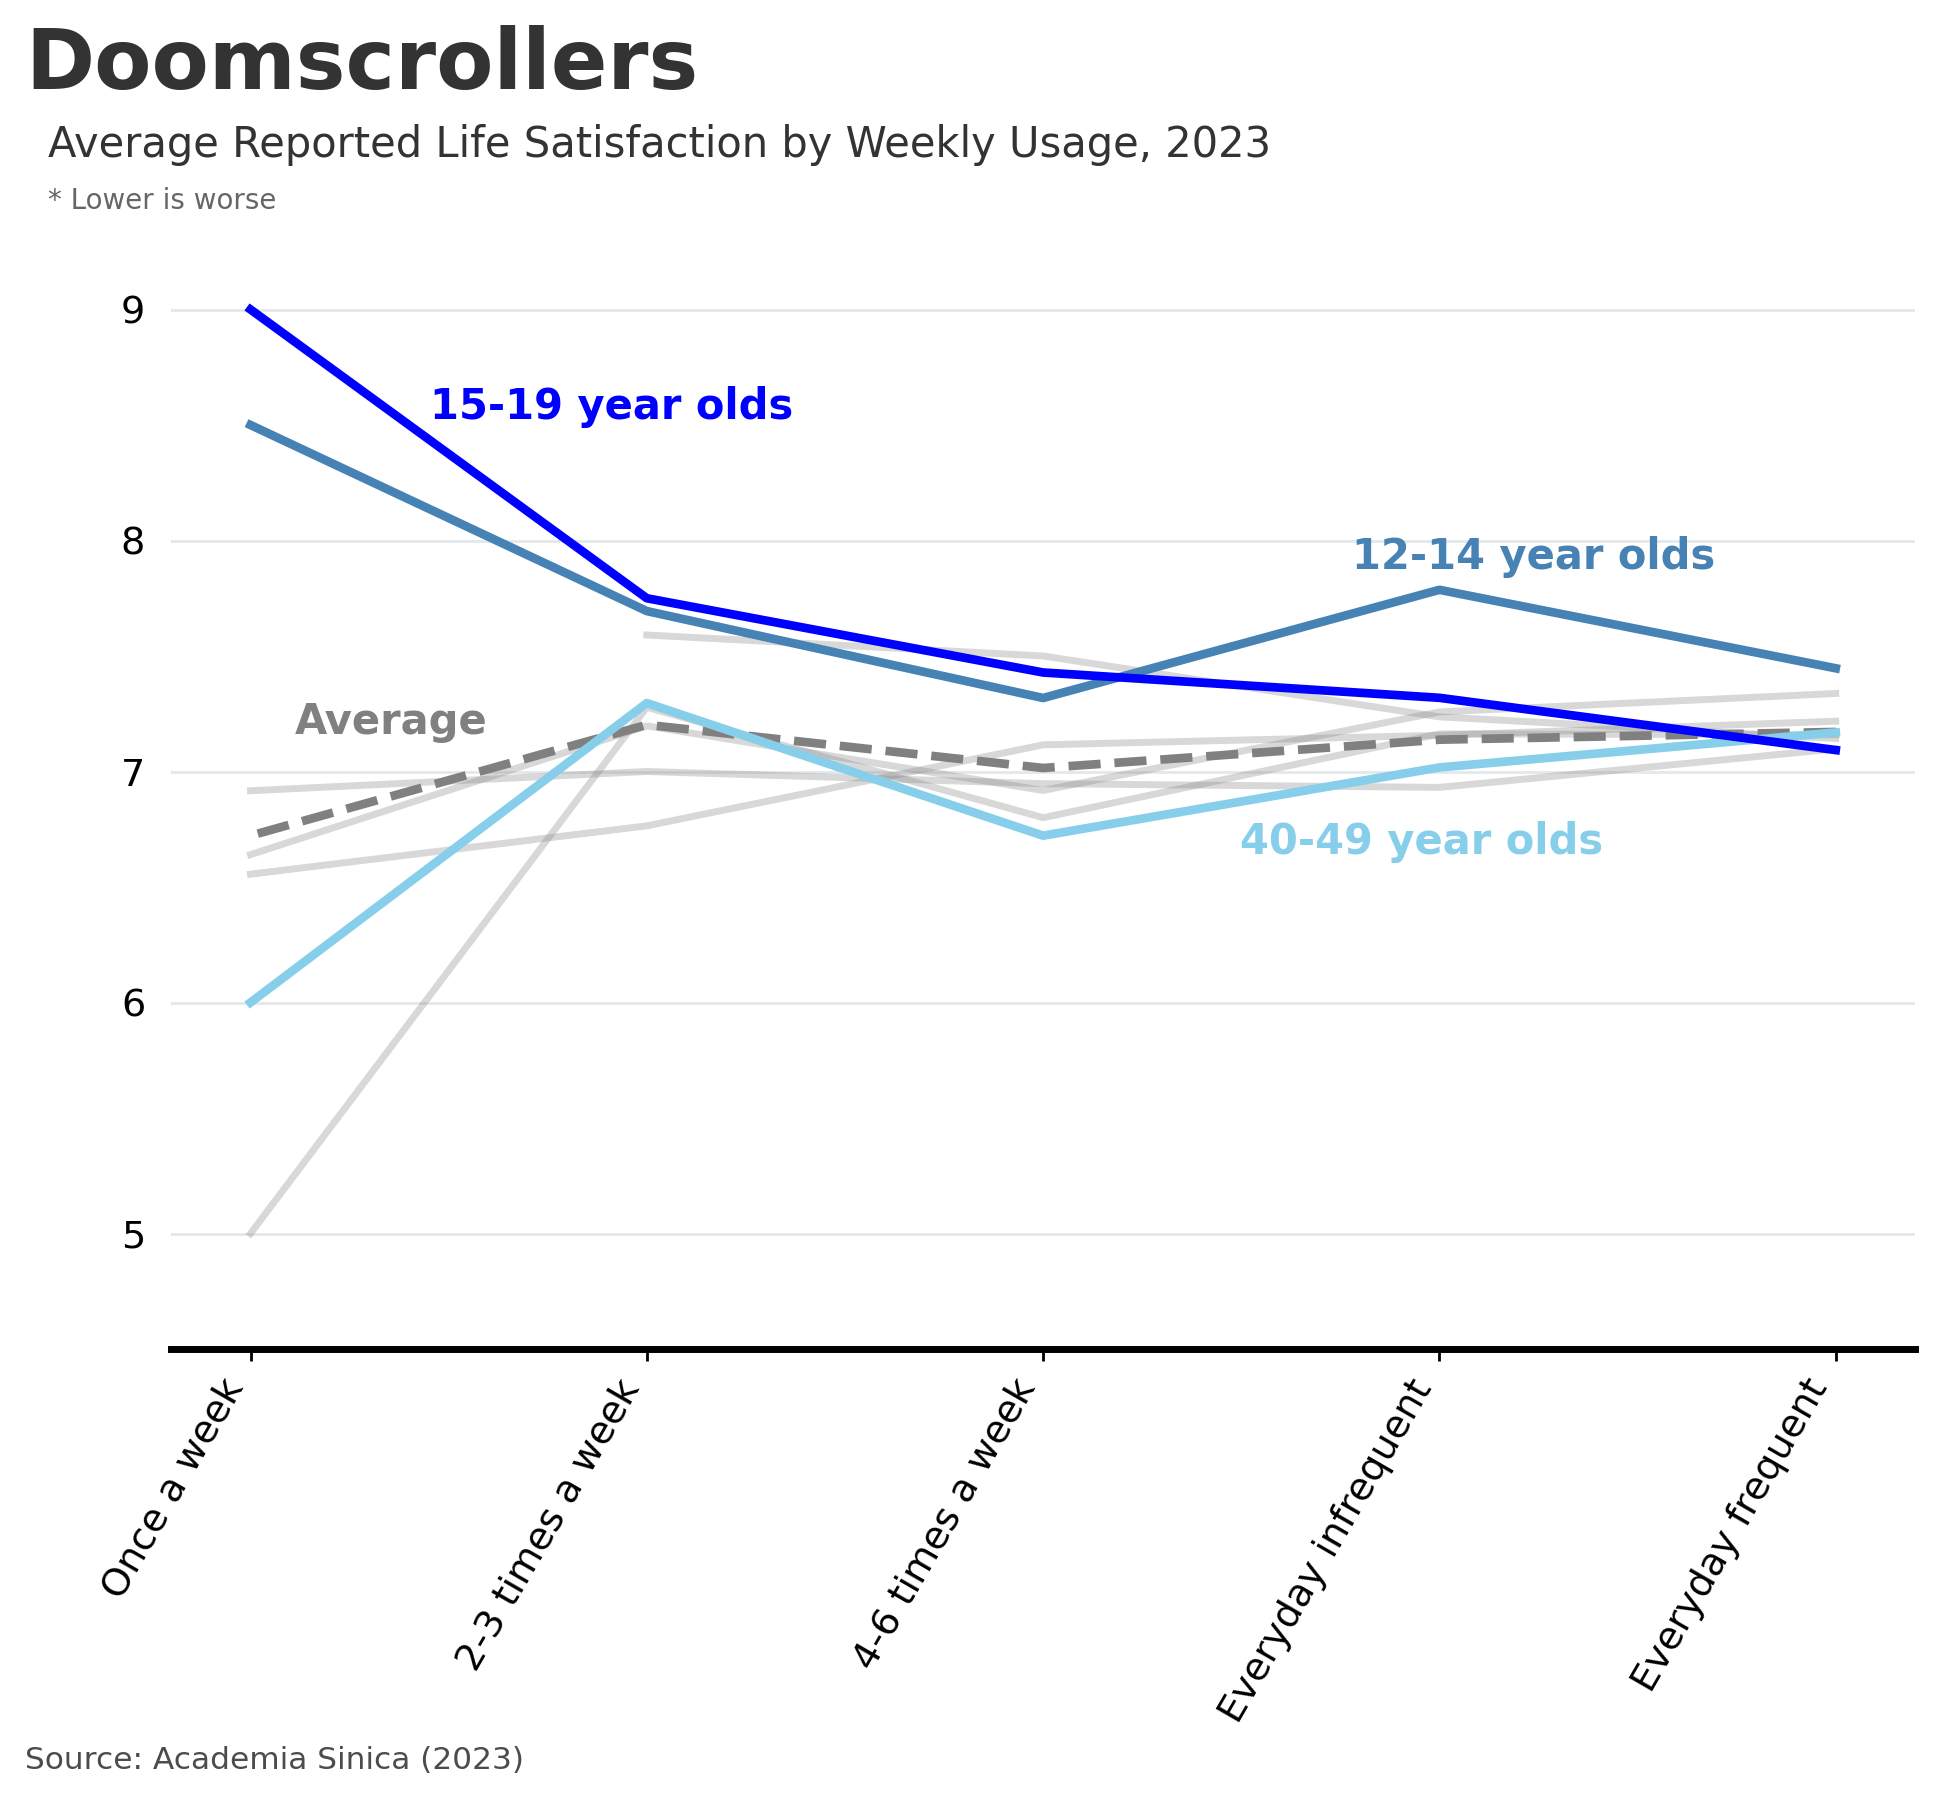

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rcParams['figure.dpi'] = 250

# Create the plot and axes
fig, ax = plt.subplots(figsize=(9, 6))

ax.grid(which="major", axis='y', color='#758D99', alpha=0.2)
ax.spines['bottom'].set_linewidth(2)

# Define the gray palette
gray_palette = [(0.5, 0.5, 0.5, 0.3)] * df_mean["age_range"].nunique()

# Plot the lines
sns.lineplot(
    x="3months_use_per_week",
    y="life_satisfaction_0to10",
    hue="age_range",
    palette=gray_palette,
    data=df_mean,
    legend=False,
    linewidth=2,
    ax=ax  # Specify the ax parameter here
)
sns.lineplot(
    x="3months_use_per_week",
    y="life_satisfaction_0to10",
    data=line_mean,
    legend=False,
    color="gray",
    linestyle="--",
    linewidth=2.5,
    ax=ax  # Specify the ax parameter here
)
sns.lineplot(
    x="3months_use_per_week",
    y="life_satisfaction_0to10",
    data=df_mean.loc[df_mean["age_range"] == 1],
    legend=False,
    color="steelblue",
    linewidth=2.5,
    ax=ax  # Specify the ax parameter here
)
sns.lineplot(
    x="3months_use_per_week",
    y="life_satisfaction_0to10",
    data=df_mean.loc[df_mean["age_range"] == 5],
    legend=False,
    color="skyblue",
    linewidth=2.5,
    ax=ax  # Specify the ax parameter here
)

sns.lineplot(
    x="3months_use_per_week",
    y="life_satisfaction_0to10",
    data=df_mean.loc[df_mean["age_range"] == 2],
    legend=False,
    color="blue",
    linewidth=2.5,
    ax=ax  # Specify the ax parameter here
)

ax.spines[['top','right','left']].set_visible(False)

ax.set_ylim(4.5, 9.5)
ax.xaxis.set_tick_params(labelsize=15)

# Set source text

ax.text(x=0.65, y=.63, s='12-14 year olds', transform=fig.transFigure, size=12, weight='bold', color='steelblue')
ax.text(x=.6, y=.44, s='40-49 year olds', transform=fig.transFigure, size=12, weight='bold', color = 'skyblue')
ax.text(x=.24, y=.73, s='15-19 year olds', transform=fig.transFigure, size=12, weight='bold', color = 'blue')
ax.text(x=0.18, y=.52, s='Average', transform=fig.transFigure, size=12, weight='bold', color = 'gray')


ax.text(x=0.06, y=.95, s="Doomscrollers", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.8, color = 'black')
ax.text(x=0.07, y=.905, s="Average Reported Life Satisfaction by Weekly Usage, 2023 ", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)
ax.text(x=0.07, y=.87, s="* Lower is worse ", transform=fig.transFigure, ha='left', fontsize=8, alpha=.6)
ax.text(x=0.06, y=-0.17, s="""Source: Academia Sinica (2023)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Customize the grid
ax.grid(axis="y", visible=True)  # Turn off vertical grid lines
ax.grid(axis="x", visible=False)

ax.yaxis.set_tick_params(pad=4,             # Pad tick labels so they don't go over y-axis
                         labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,
                         color = (0.5, 0.5, 0.5, 0.01))       # Set tick label size


# Define your x-axis tick positions
x = [5, 4, 3, 2, 1]  # Adjust as needed based on your data

# Define your x-axis tick labels
xticks_labels = ['Once a week', '2-3 times a week', '4-6 times a week', 'Everyday infrequent', 'Everyday frequent']

# Set the x-axis ticks and labels
plt.xticks(x, xticks_labels, rotation=60, ha='right')



ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.invert_xaxis()
plt.tick_params(axis='x', labelsize=11)
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()
